# **Cognifyz Technologies**

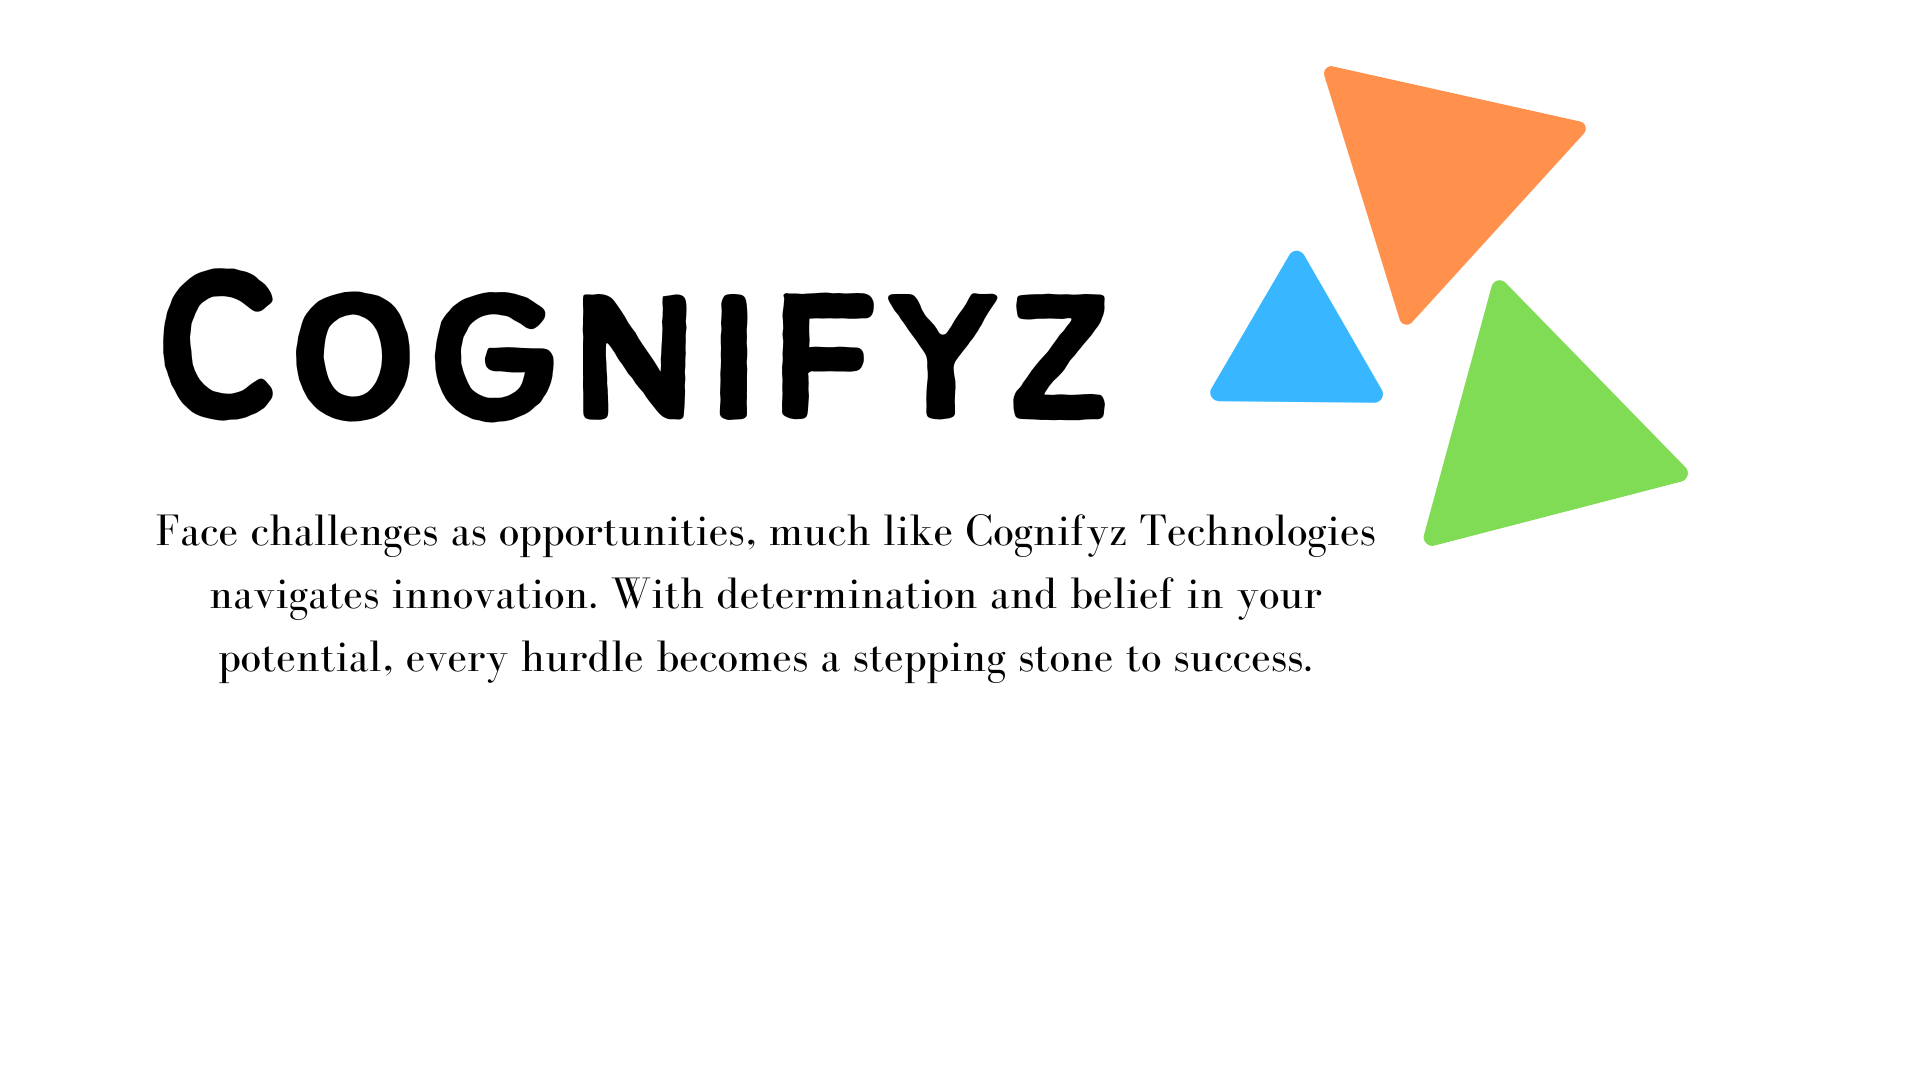

In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [50]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/dataset.csv
/kaggle/input/cognifyz/Dataset .csv
/kaggle/input/cognifyzimage1/Cognifyz.png


# **Importing Libraries**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

Reading The CSV file

In [52]:
df = pd.read_csv('../input/dataset/dataset.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [53]:
df.shape

(9551, 21)

# *******Display/reading heading ***

In [54]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# **Below code gives required columns only by dropping remaing** 

In [55]:
df = df.drop(['Locality Verbose',], axis = 1)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**below line is to check null values**

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Longitude             9551 non-null   float64
 7   Latitude              9551 non-null   float64
 8   Cuisines              9542 non-null   object 
 9   Average Cost for two  9551 non-null   int64  
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

# **Dropping Duplicates**

In [57]:
df.drop_duplicates(inplace = True)
df.shape

(9551, 20)

**Now you can compare initally there are (9551, 21) now (9551,21) that means 5 columns removed**

In [58]:
df['Aggregate rating'].unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Longitude             9551 non-null   float64
 7   Latitude              9551 non-null   float64
 8   Cuisines              9542 non-null   object 
 9   Average Cost for two  9551 non-null   int64  
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

# **Droping Nullvalues**

In [60]:
df.dropna(inplace = True)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# **Renaming The Lenghthy Names From Original**

In [61]:
df.rename(columns = {'Switch to order menu':'SwitchOrder', 'Has Online delivery':'Online delivery','Is delivering now':'delivering now',}, inplace = True)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Online delivery,delivering now,SwitchOrder,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [62]:
df['Address'].unique()

array(['Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City',
       'Little Tokyo, 2277 Chino Roces Avenue, Legaspi Village, Makati City',
       'Edsa Shangri-La, 1 Garden Way, Ortigas, Mandaluyong City', ...,
       'Kuru�_e��me Mahallesi, Muallim Naci Caddesi, No 56, Be��ikta��, ��stanbul',
       'Kuru�_e��me Mahallesi, Muallim Naci Caddesi, No 64/B, Be��ikta��, ��stanbul',
       'Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, Kad۱k�_y, ��stanbul'],
      dtype=object)

In [63]:
df['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Bras�_lia', 'Rio de Janeiro', 'S��o Paulo',
       'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup',
       'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent',
       'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton',
       'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield',
       'Mc Millan', 'Middleton Beach', 'Monroe', 'Montville',
       'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola',
       'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentham East', '

# **Listed in address and city, Both are there so lets keep only one for better Analysis**

In [64]:
df.drop(['Address'], axis = 1)

,Restaurant ID,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Online delivery,delivering now,SwitchOrder,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,Karak�_y,28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,Ko��uyolu,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,Kuru�_e��me,29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,Kuru�_e��me,29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [65]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Online delivery,delivering now,SwitchOrder,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [66]:
df['Address'].unique()

array(['Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City',
       'Little Tokyo, 2277 Chino Roces Avenue, Legaspi Village, Makati City',
       'Edsa Shangri-La, 1 Garden Way, Ortigas, Mandaluyong City', ...,
       'Kuru�_e��me Mahallesi, Muallim Naci Caddesi, No 56, Be��ikta��, ��stanbul',
       'Kuru�_e��me Mahallesi, Muallim Naci Caddesi, No 64/B, Be��ikta��, ��stanbul',
       'Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, Kad۱k�_y, ��stanbul'],
      dtype=object)

In [67]:
df['Address'].unique()

array(['Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City',
       'Little Tokyo, 2277 Chino Roces Avenue, Legaspi Village, Makati City',
       'Edsa Shangri-La, 1 Garden Way, Ortigas, Mandaluyong City', ...,
       'Kuru�_e��me Mahallesi, Muallim Naci Caddesi, No 56, Be��ikta��, ��stanbul',
       'Kuru�_e��me Mahallesi, Muallim Naci Caddesi, No 64/B, Be��ikta��, ��stanbul',
       'Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, Kad۱k�_y, ��stanbul'],
      dtype=object)

In [68]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Online delivery,delivering now,SwitchOrder,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [69]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Online delivery,delivering now,SwitchOrder,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Cleaning The Locality Column****

In [70]:
df['Locality'].value_counts()



Locality
Connaught Place                                122
Rajouri Garden                                  99
Shahdara                                        87
Defence Colony                                  86
Pitampura                                       85
                                              ... 
Omaxe Celebration Mall, Sohna Road, Gurgaon      1
Park Inn, Sector 15, Gurgaon                     1
Plaza Mall, MG Road                              1
Ramada Gurgaon Central, Sector 44                1
Moda                                             1
Name: count, Length: 1206, dtype: int64

In [71]:
locality = df['Locality'].value_counts(ascending = False)
locality

Locality
Connaught Place                                122
Rajouri Garden                                  99
Shahdara                                        87
Defence Colony                                  86
Pitampura                                       85
                                              ... 
Omaxe Celebration Mall, Sohna Road, Gurgaon      1
Park Inn, Sector 15, Gurgaon                     1
Plaza Mall, MG Road                              1
Ramada Gurgaon Central, Sector 44                1
Moda                                             1
Name: count, Length: 1206, dtype: int64

# Creating a Variable less than 50 Restuarants in location****

In [72]:
Locality_lessthan50 = locality[locality<50]
Locality_lessthan50

Locality
Palam Vihar                                    49
Preet Vihar                                    49
Sector 41                                      48
Rohini                                         48
Netaji Subhash Place                           48
                                               ..
Omaxe Celebration Mall, Sohna Road, Gurgaon     1
Park Inn, Sector 15, Gurgaon                    1
Plaza Mall, MG Road                             1
Ramada Gurgaon Central, Sector 44               1
Moda                                            1
Name: count, Length: 1156, dtype: int64

In [73]:
def handle_locality(value):
    if value in Locality_lessthan50:
        return 'others'
    else:
        return value

df['Locality'] = df['Locality'].apply(handle_locality)
df['Locality'].value_counts()

Locality
others                        6148
Connaught Place                122
Rajouri Garden                  99
Shahdara                        87
Defence Colony                  86
Pitampura                       85
Malviya Nagar                   85
Mayur Vihar Phase 1             84
Rajinder Nagar                  81
Safdarjung                      80
Satyaniketan                    79
Krishna Nagar                   77
Sector 62                       76
Karol Bagh                      76
Sector 18                       75
Hauz Khas                       74
Kalkaji                         73
Sector 15                       71
DLF Phase 3                     69
Mahipalpur                      69
Mukherjee Nagar                 68
Chandni Chowk                   67
Shalimar Bagh                   67
Greater Kailash (GK) 2          66
Greater Kailash (GK) 1          66
Kamla Nagar                     65
Delhi University-GTB Nagar      65
Paharganj                       64
MG Road    

In [74]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Online delivery,delivering now,SwitchOrder,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...",others,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",others,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",others,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...",others,121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",others,121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Cleanig Cuisines Column****

In [75]:
cuisines = df['Cuisines'].value_counts(ascending  = False)


cuisines_greaterthan10 = cuisines[cuisines>50]



def handle_cuisines(value):
    if(value in cuisines_greaterthan10):
        return 'others'
    else:
        return value
        
df['Cuisines'] = df['Cuisines'].apply(handle_cuisines)
df['Cuisines'].value_counts()

Cuisines
others                                                   5380
Raw Meats, North Indian, Fast Food                         49
Finger Food                                                49
Fast Food, North Indian                                    46
North Indian, South Indian, Chinese                        46
                                                         ... 
Bengali, Fast Food                                          1
North Indian, Rajasthani, Asian                             1
Chinese, Thai, Malaysian, Indonesian                        1
Bakery, Desserts, North Indian, Bengali, South Indian       1
Italian, World Cuisine                                      1
Name: count, Length: 1792, dtype: int64

In [76]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Online delivery,delivering now,SwitchOrder,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...",others,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",others,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",others,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...",others,121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",others,121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [77]:
df['Rating text'].value_counts()

Rating text
Average      3734
Not rated    2148
Good         2096
Very Good    1078
Excellent     300
Poor          186
Name: count, dtype: int64

# **Data is cleaned Lets do Visualization**

*Count the various Locations*

# **Data Visualisation for Locality**

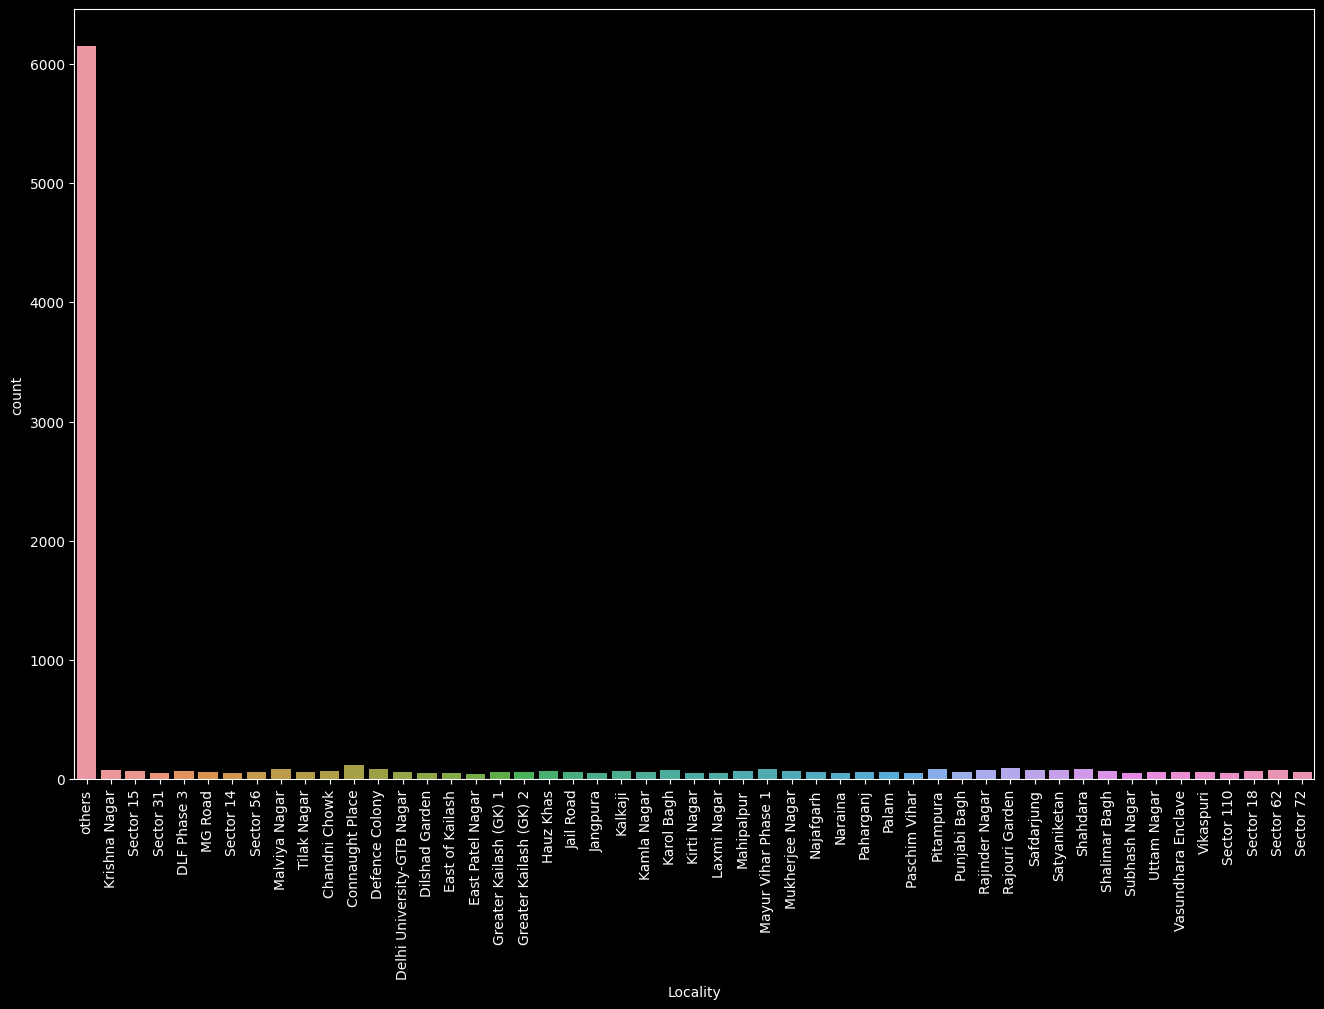

In [78]:
plt.figure(figsize=(16, 10))
ax = sns.countplot(x='Locality', data=df)
plt.xticks(rotation=90)
plt.show()

# Data Visualisation for  Aggregate rating****

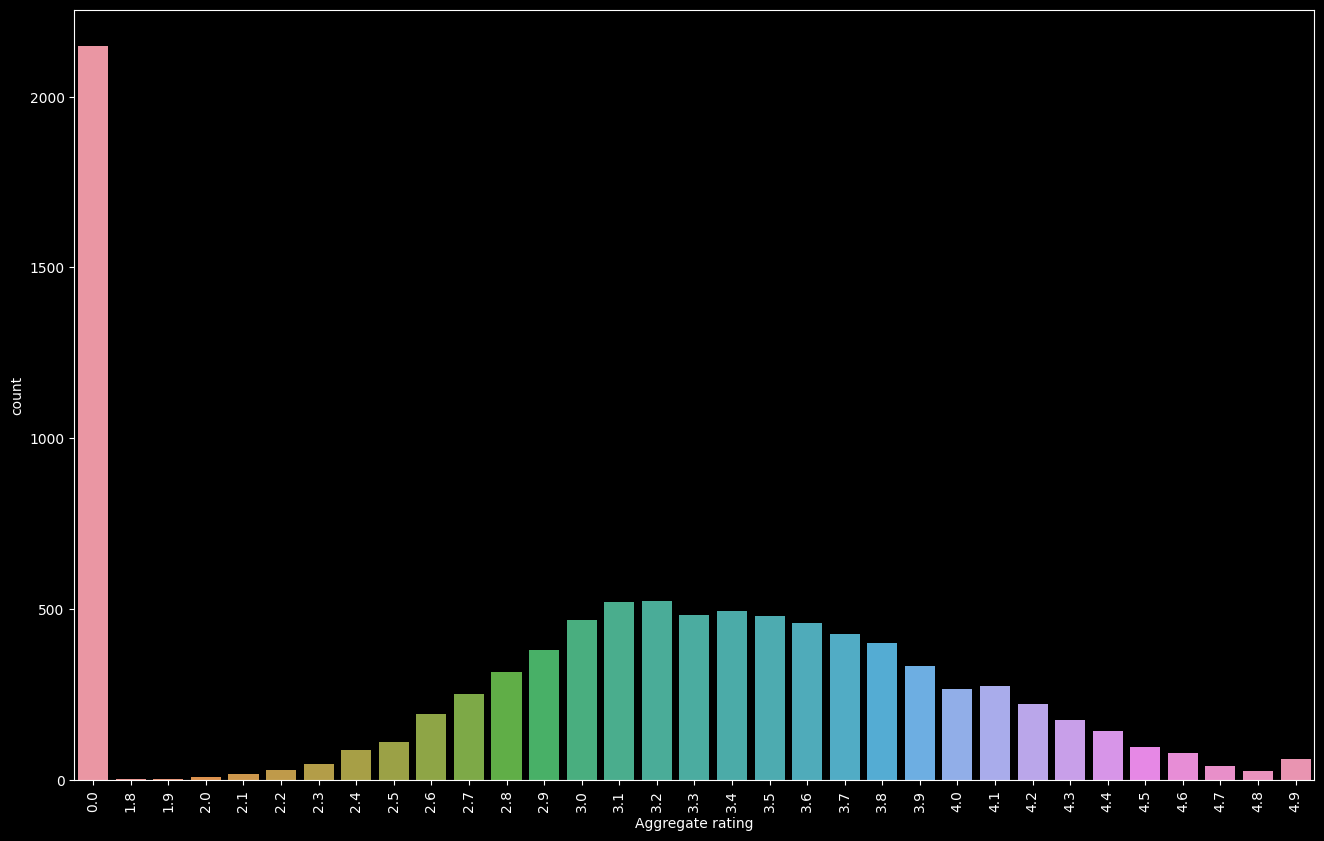

In [79]:
plt.figure(figsize=(16, 10))
ax = sns.countplot(x='Aggregate rating', data=df)
plt.xticks(rotation=90)
plt.show()

# **Visualizing/Checking Online Order Facility**

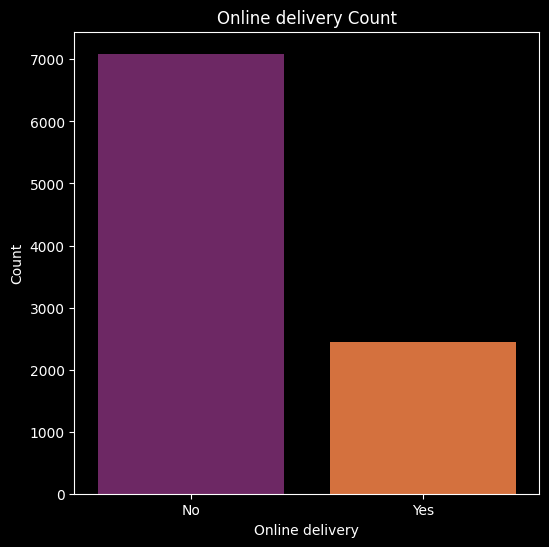

In [80]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Online delivery', data=df, palette='inferno')
plt.title('Online delivery Count')
plt.xlabel('Online delivery')
plt.ylabel('Count')
plt.show()

# **Visulazing/Checking BOOK TABLE Option**

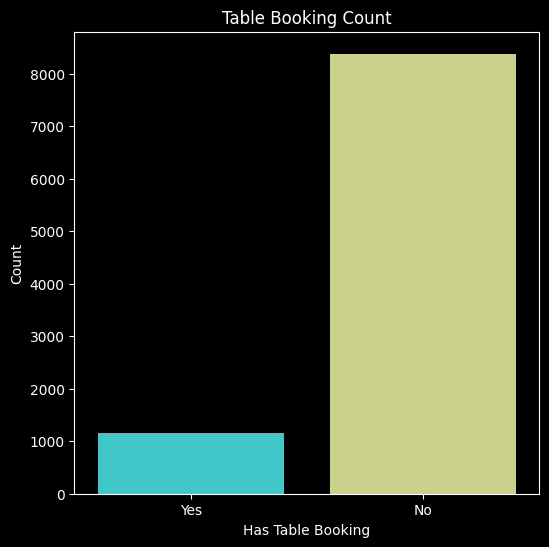

In [81]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Has Table booking', data=df, palette='rainbow')
plt.title('Table Booking Count')
plt.xlabel('Has Table Booking')
plt.ylabel('Count')
plt.show()

# **Visualising Book Table booking persons rating vs Price range** 

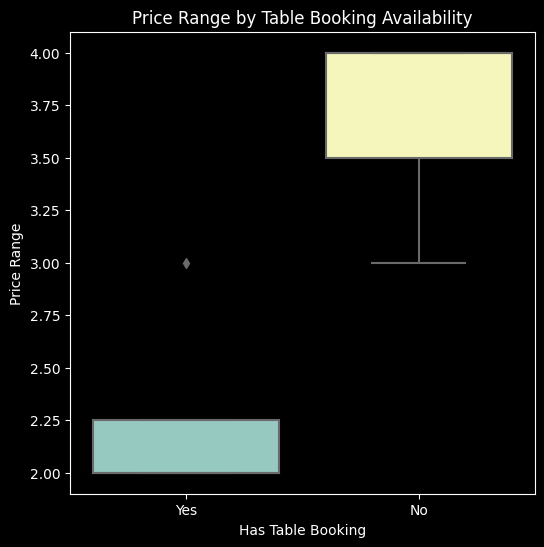

In [82]:
data = {
    'Has Table booking': ['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No'],
    'Price range': [2, 3, 2, 4, 2, 3, 4]
}
df = pd.DataFrame(data)


plt.figure(figsize=(6, 6))
sns.boxplot(x='Has Table booking', y='Price range', data=df)
plt.title('Price Range by Table Booking Availability')
plt.xlabel('Has Table Booking')
plt.ylabel('Price Range')
plt.show()

# **Visualizing Online Order Facility, Location Wise**

In [83]:
file_path = '../input/dataset/dataset.csv'  
data = pd.read_csv(file_path)

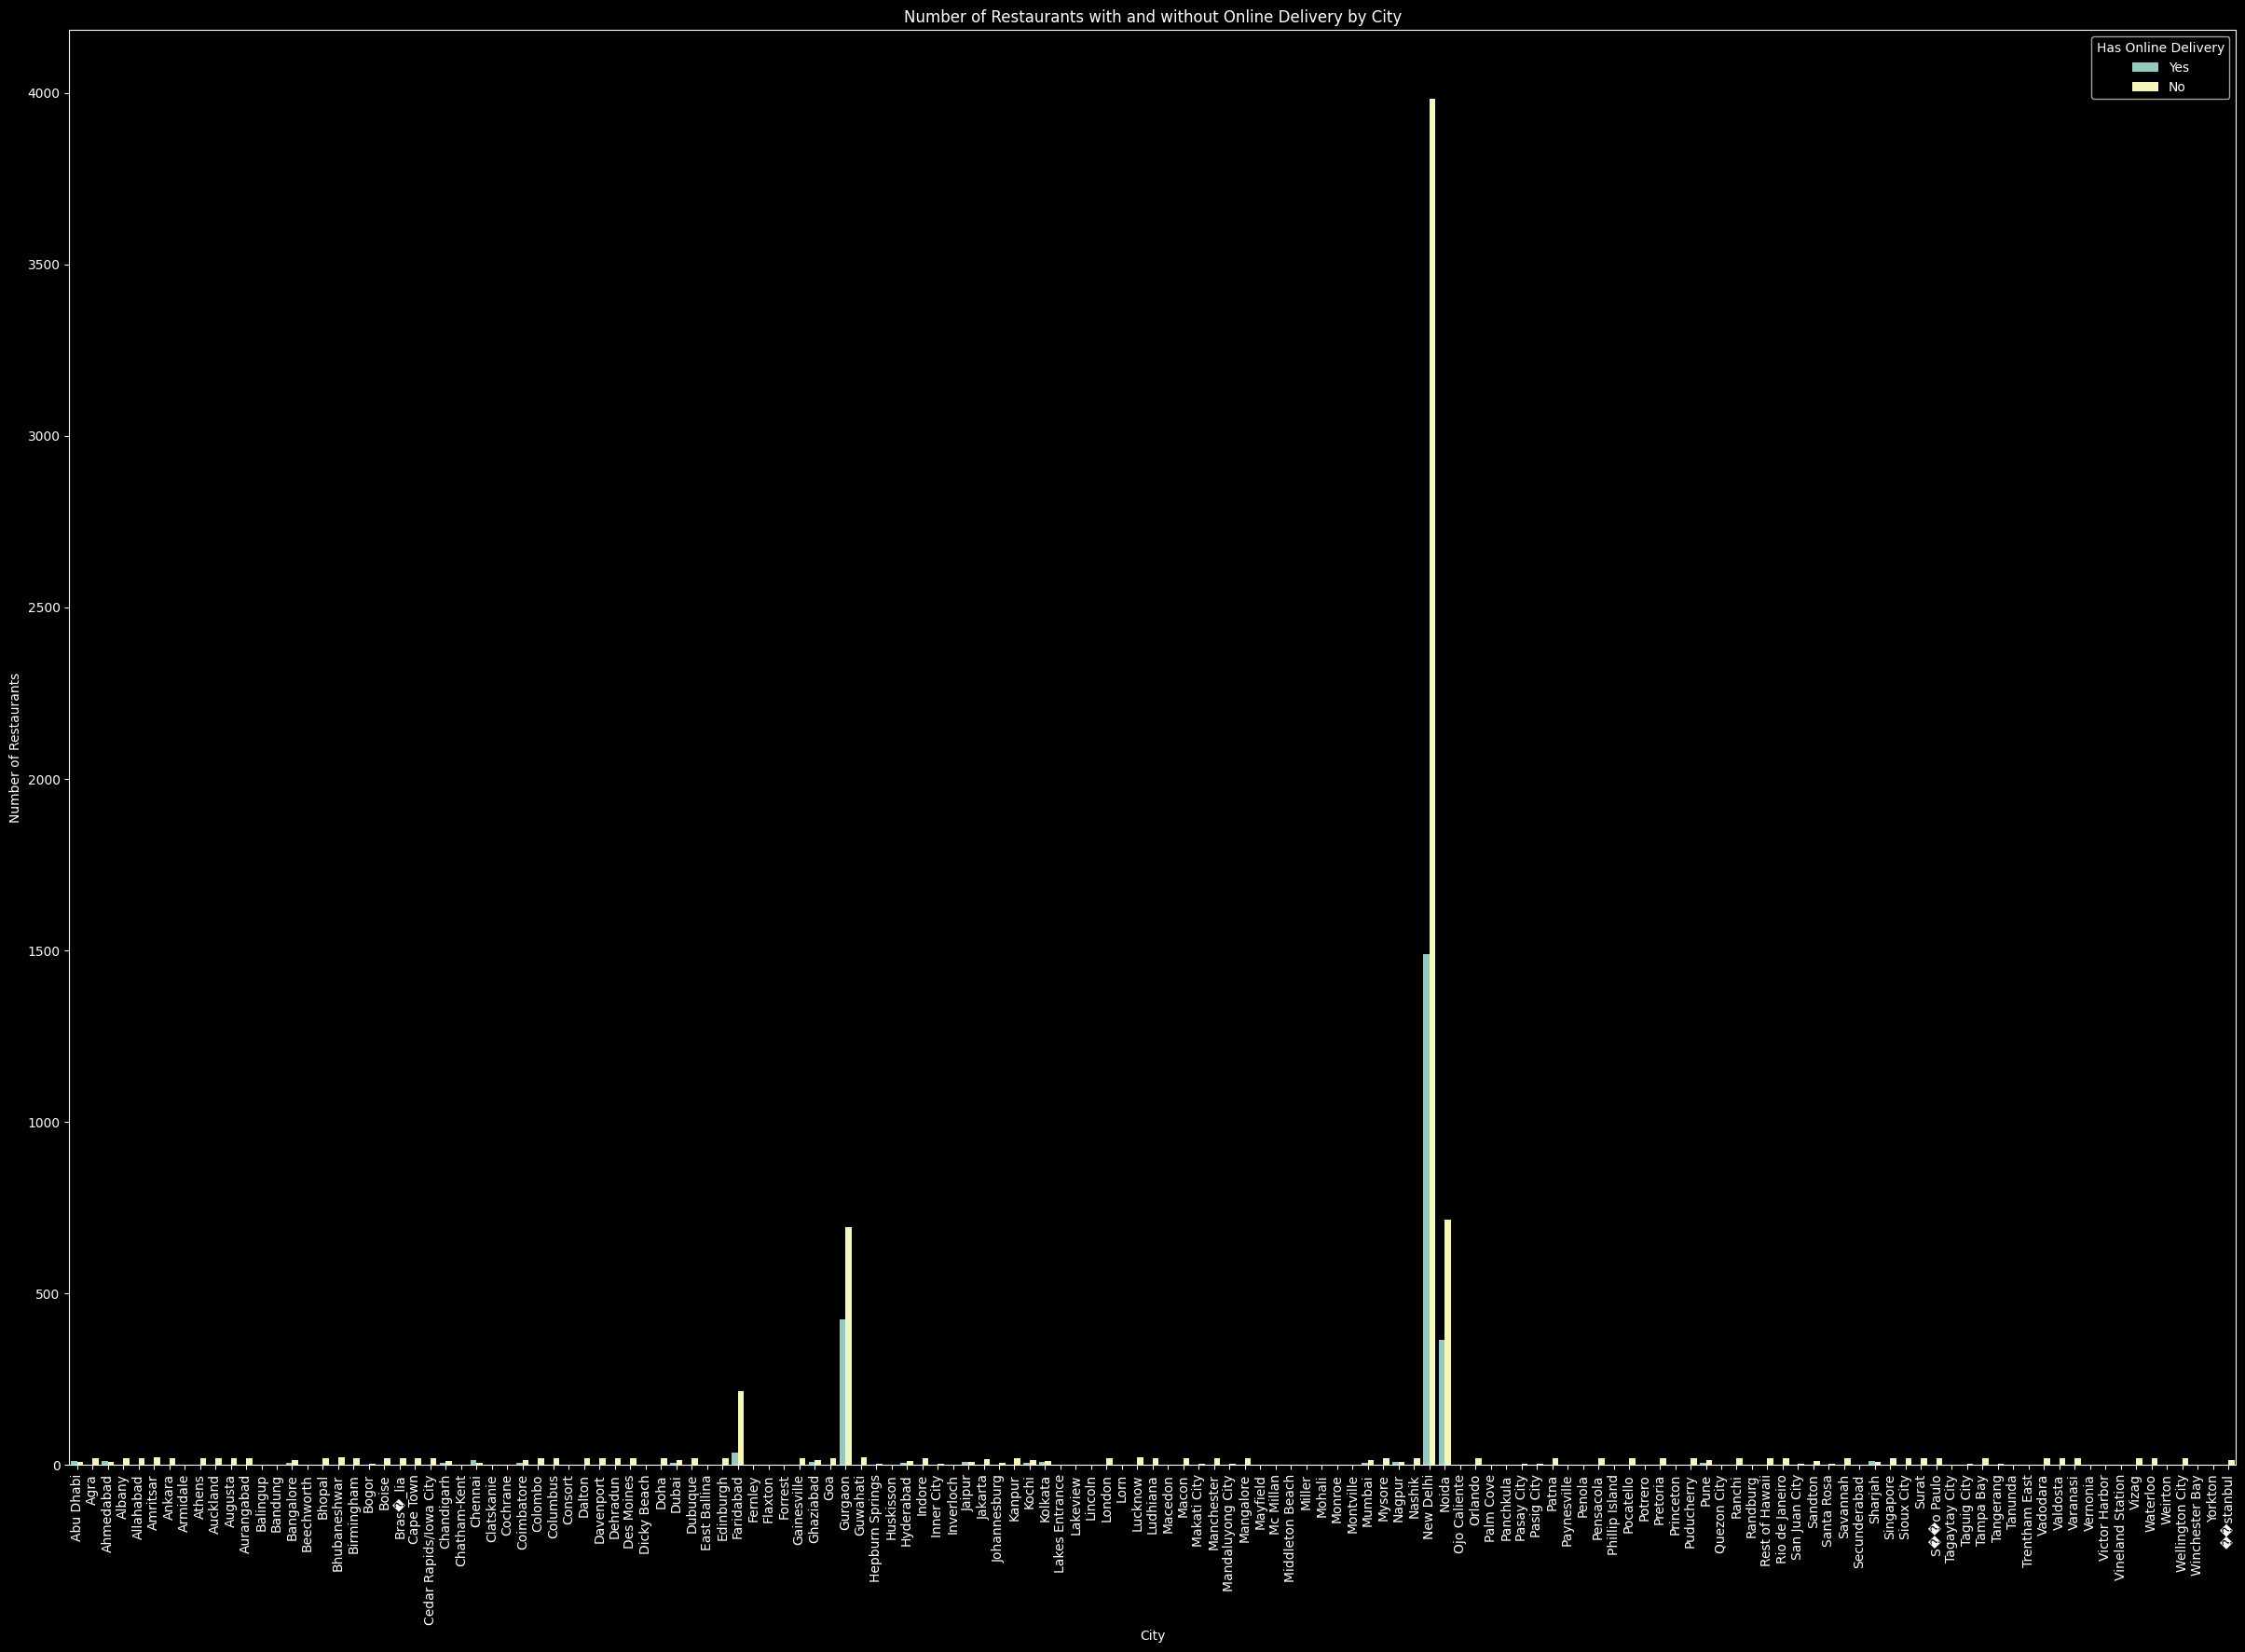

In [84]:
pivot_table = pd.pivot_table(
    data, 
    values='Restaurant ID', 
    index='City', 
    columns='Has Online delivery', 
    aggfunc='count', 
    fill_value=0
)
pivot_table = pivot_table.reset_index()
pivot_melted = pivot_table.melt(id_vars='City', value_vars=['Yes', 'No'], var_name='Has Online Delivery', value_name='Count')
plt.figure(figsize=(30, 20))
sns.barplot(data=pivot_melted, x='City', y='Count', hue='Has Online Delivery')
plt.xticks(rotation=90)
plt.title('Number of Restaurants with and without Online Delivery by City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.legend(title='Has Online Delivery')
plt.show()

# **Visualizing Book table facility Location wise**

In [85]:
file_path = '../input/dataset/dataset.csv' 
data = pd.read_csv(file_path)

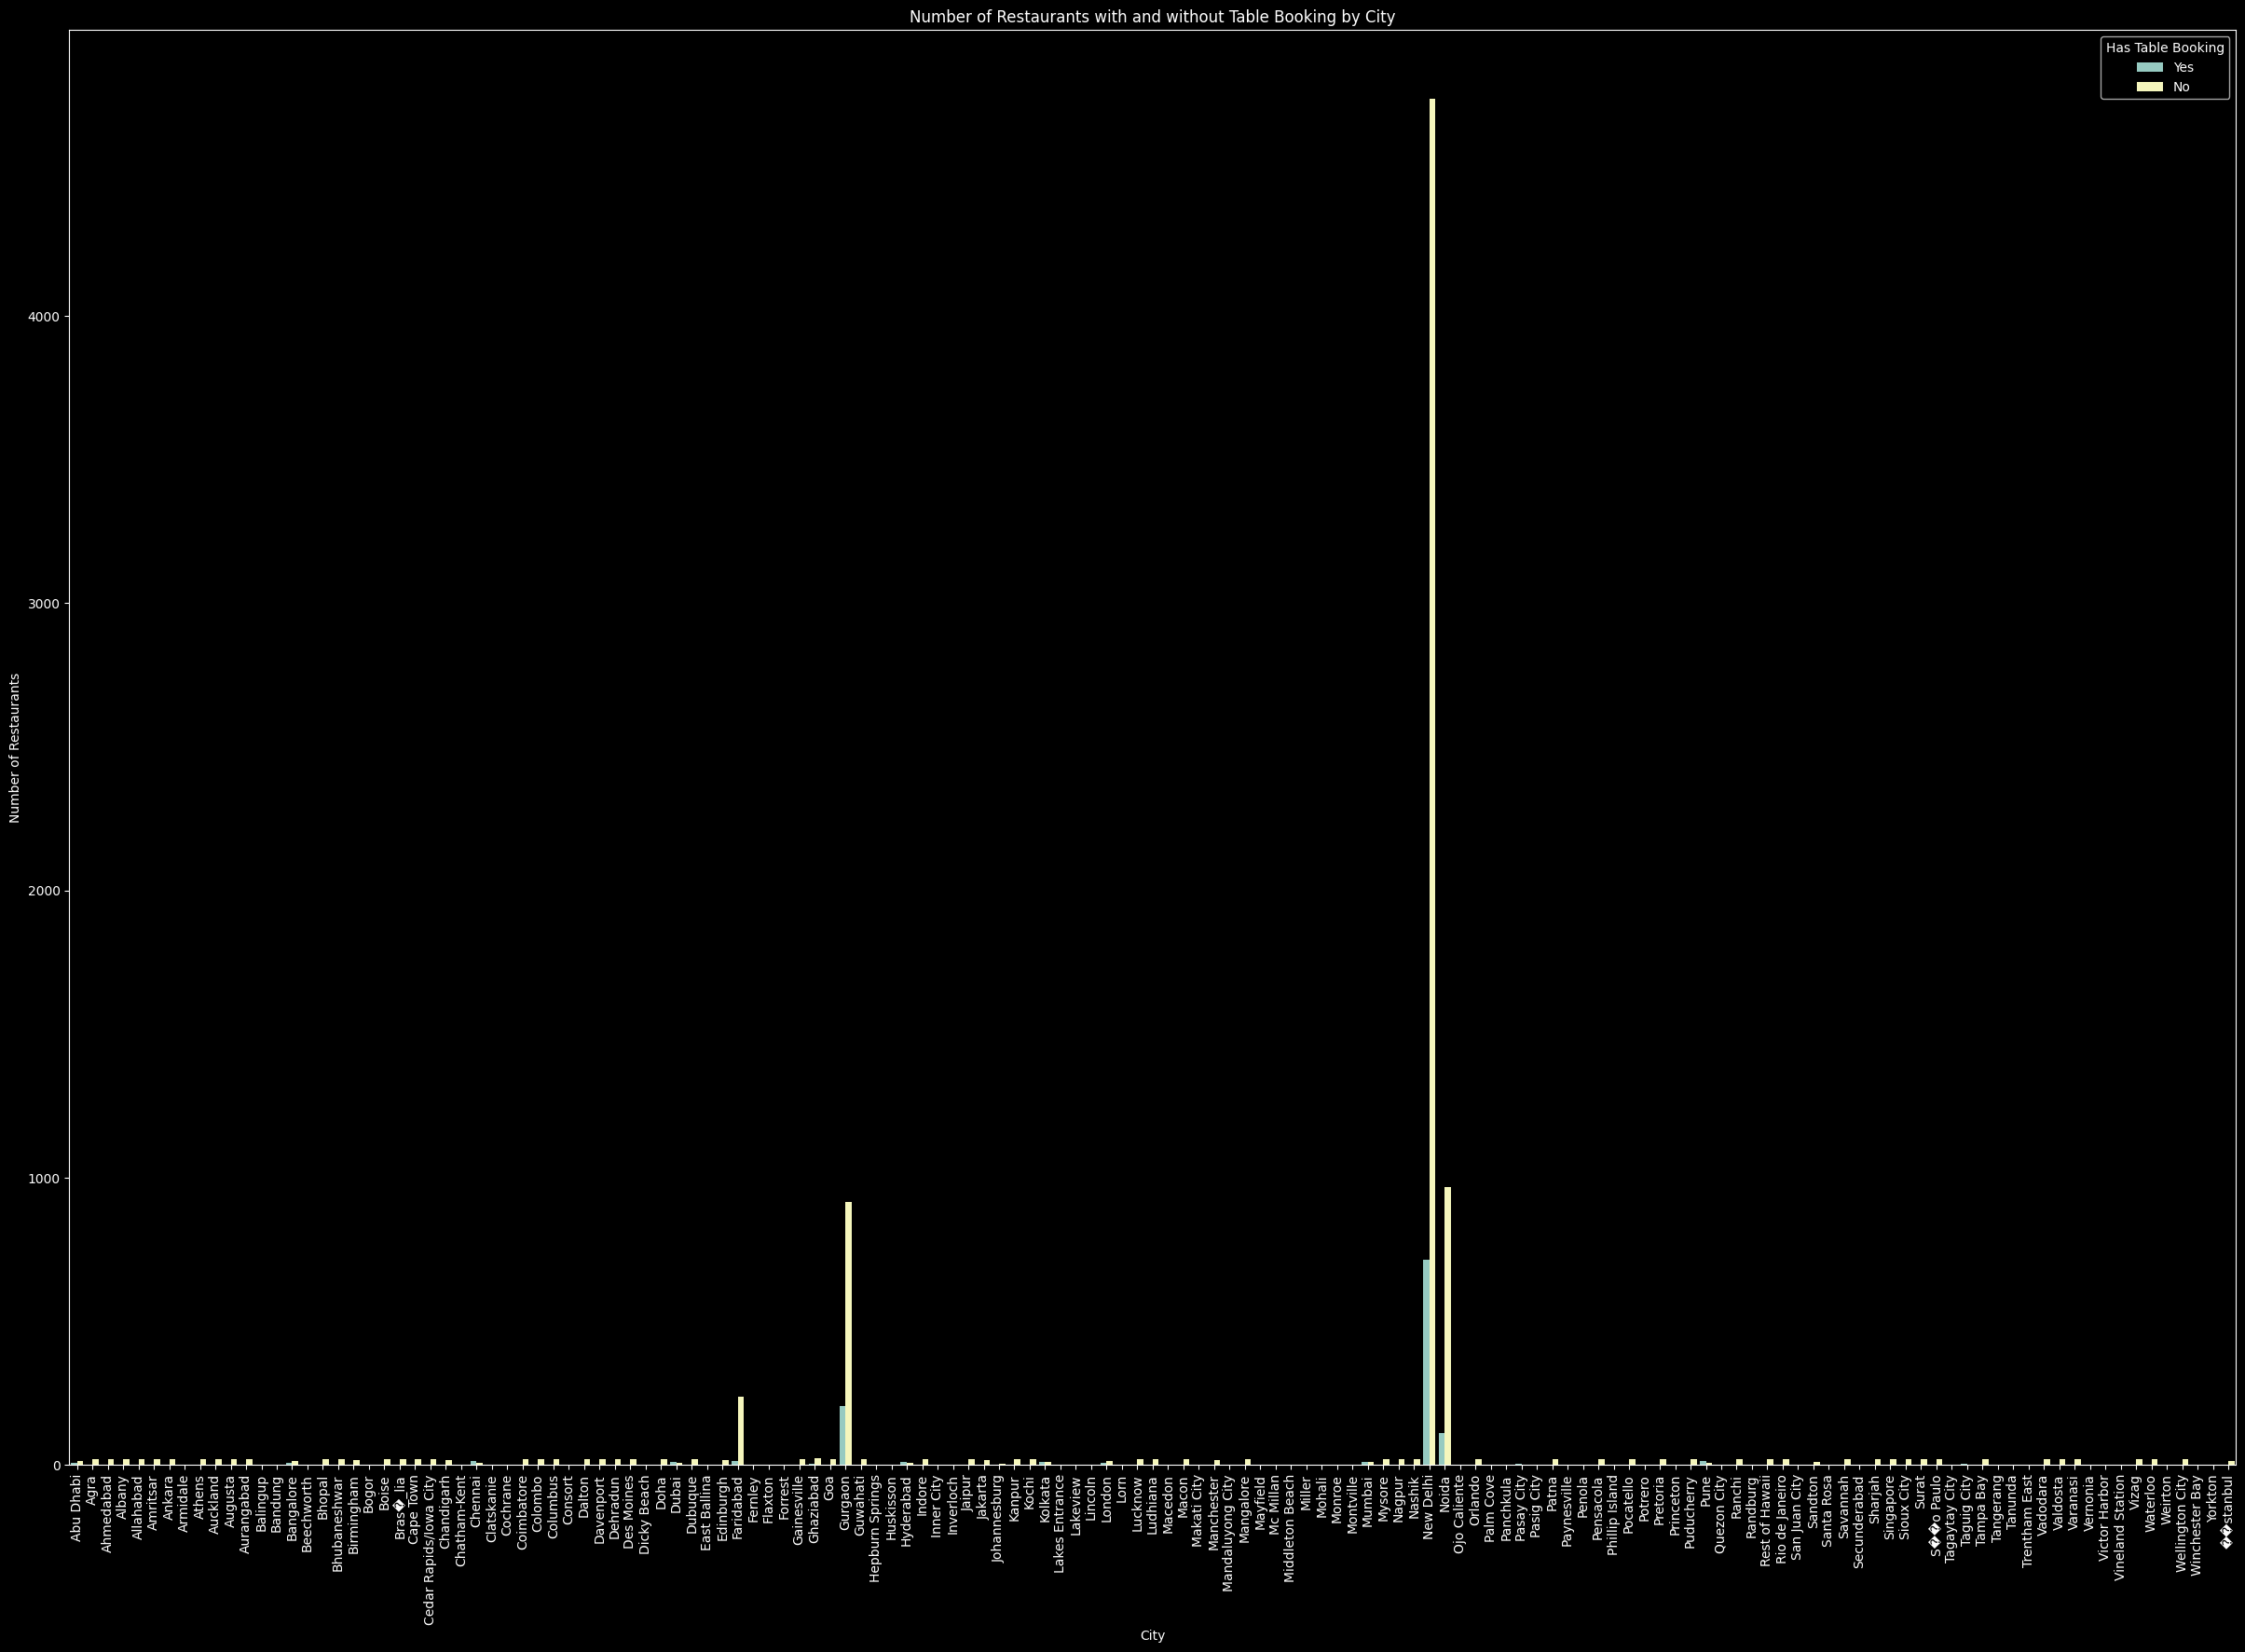

In [86]:
pivot_table = pd.pivot_table(
    data, 
    values='Restaurant ID', 
    index='City', 
    columns='Has Table booking', 
    aggfunc='count', 
    fill_value=0
)
pivot_table = pivot_table.reset_index()
pivot_melted = pivot_table.melt(id_vars='City', value_vars=['Yes', 'No'], var_name='Has Table Booking', value_name='Count')
plt.figure(figsize=(30, 20))
sns.barplot(data=pivot_melted, x='City', y='Count', hue='Has Table Booking')
plt.xticks(rotation=90)
plt.title('Number of Restaurants with and without Table Booking by City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.legend(title='Has Table Booking')
plt.show()

# **data viusualzing Cuisine preference vs Aggregate Rating**

In [87]:
file_path = '../input/dataset/dataset.csv'
data = pd.read_csv(file_path)

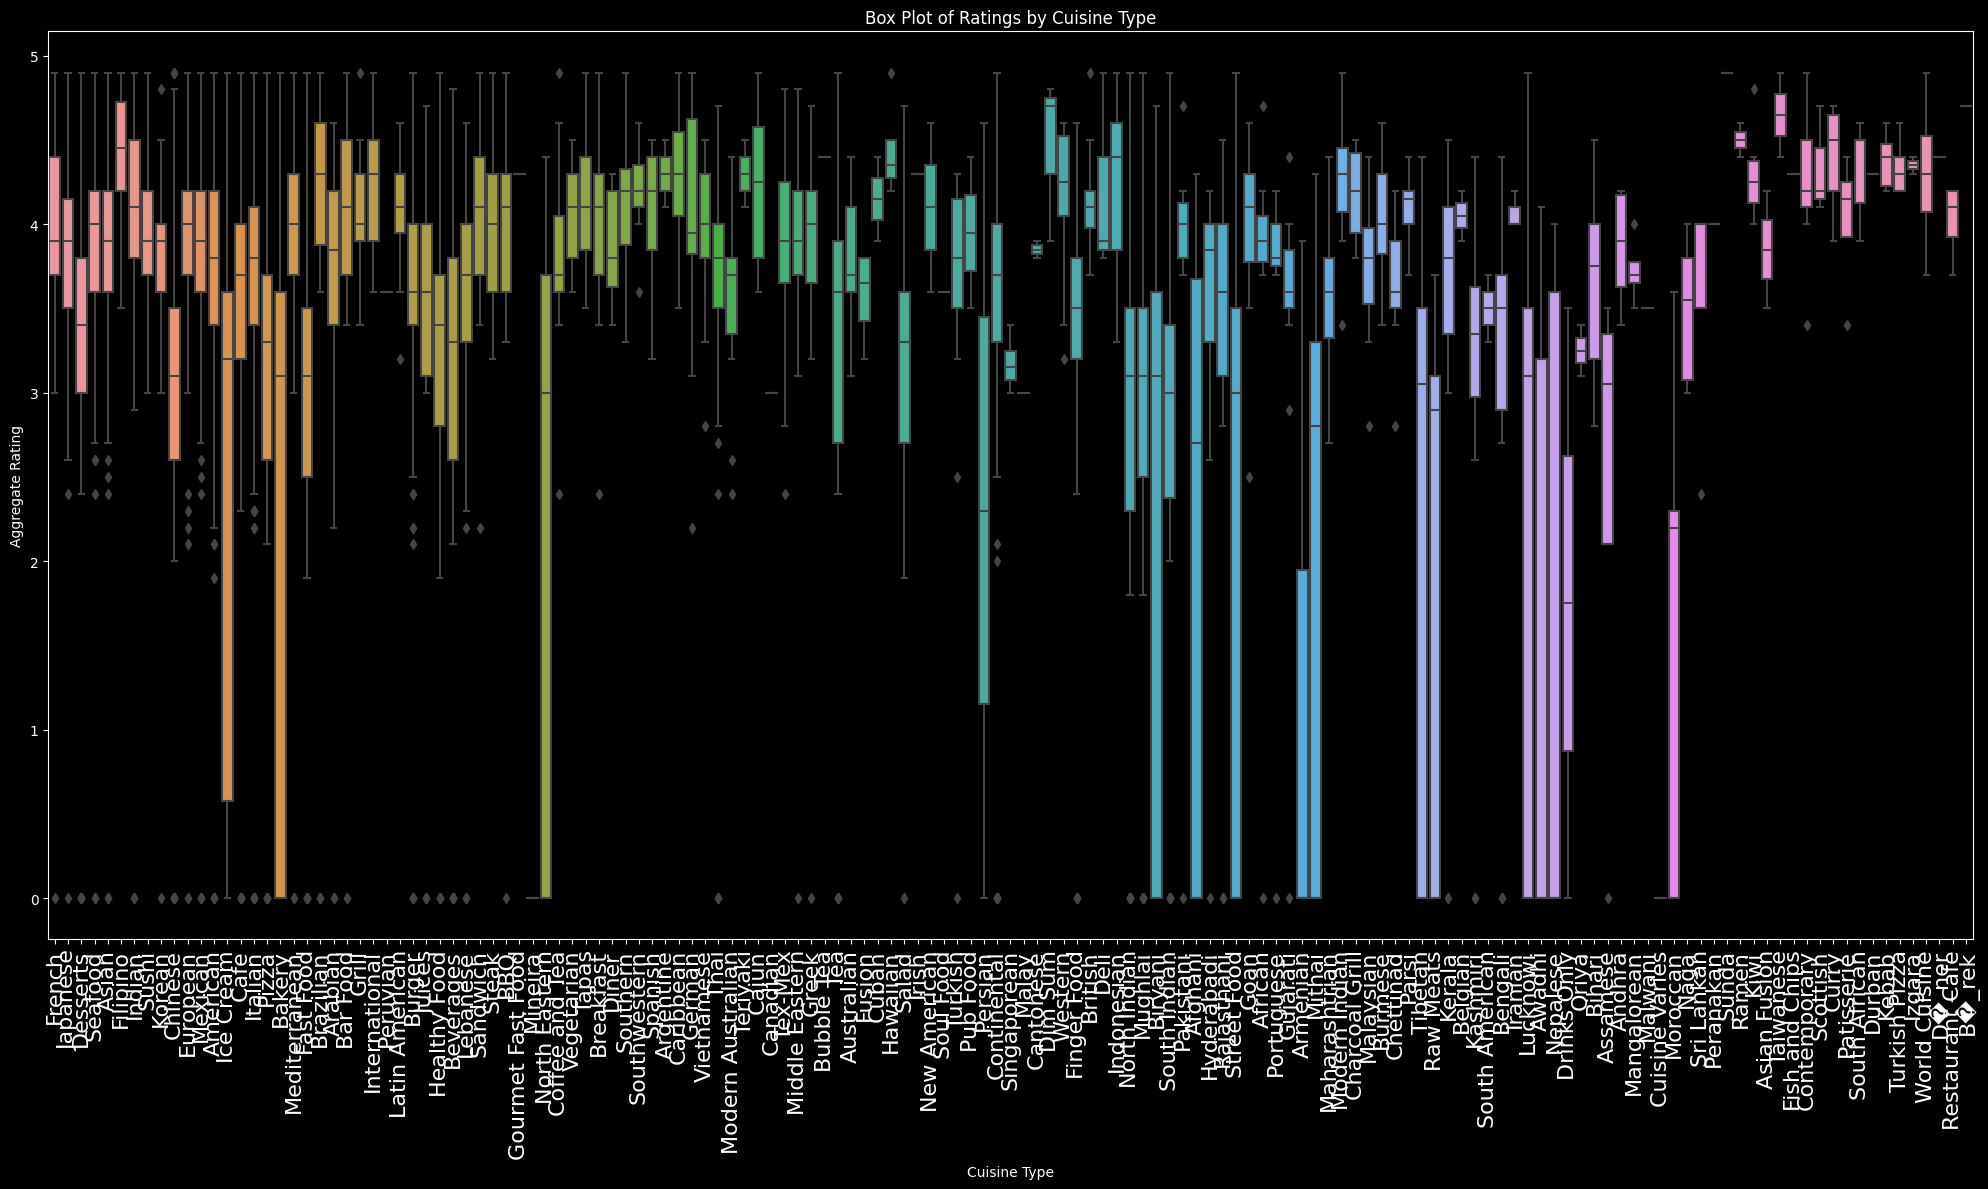

In [88]:
data['Cuisines'] = data['Cuisines'].str.split(', ')
data = data.explode('Cuisines')
plt.figure(figsize=(20, 12))
ax = sns.boxplot(x='Cuisines', y='Aggregate rating', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=16)
plt.title('Box Plot of Ratings by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Aggregate Rating')
plt.tight_layout()
plt.show()


# **Grouping the types of resturants, Location Wise**

In [89]:

file_path = '../input/dataset/dataset.csv'
df = pd.read_csv(file_path)
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [90]:
grouped_data = data.groupby(['City', 'Cuisines']).size().reset_index(name='Count')

In [91]:
top_cities = grouped_data['City'].value_counts().index[:10]
subset_data = grouped_data[grouped_data['City'].isin(top_cities)]

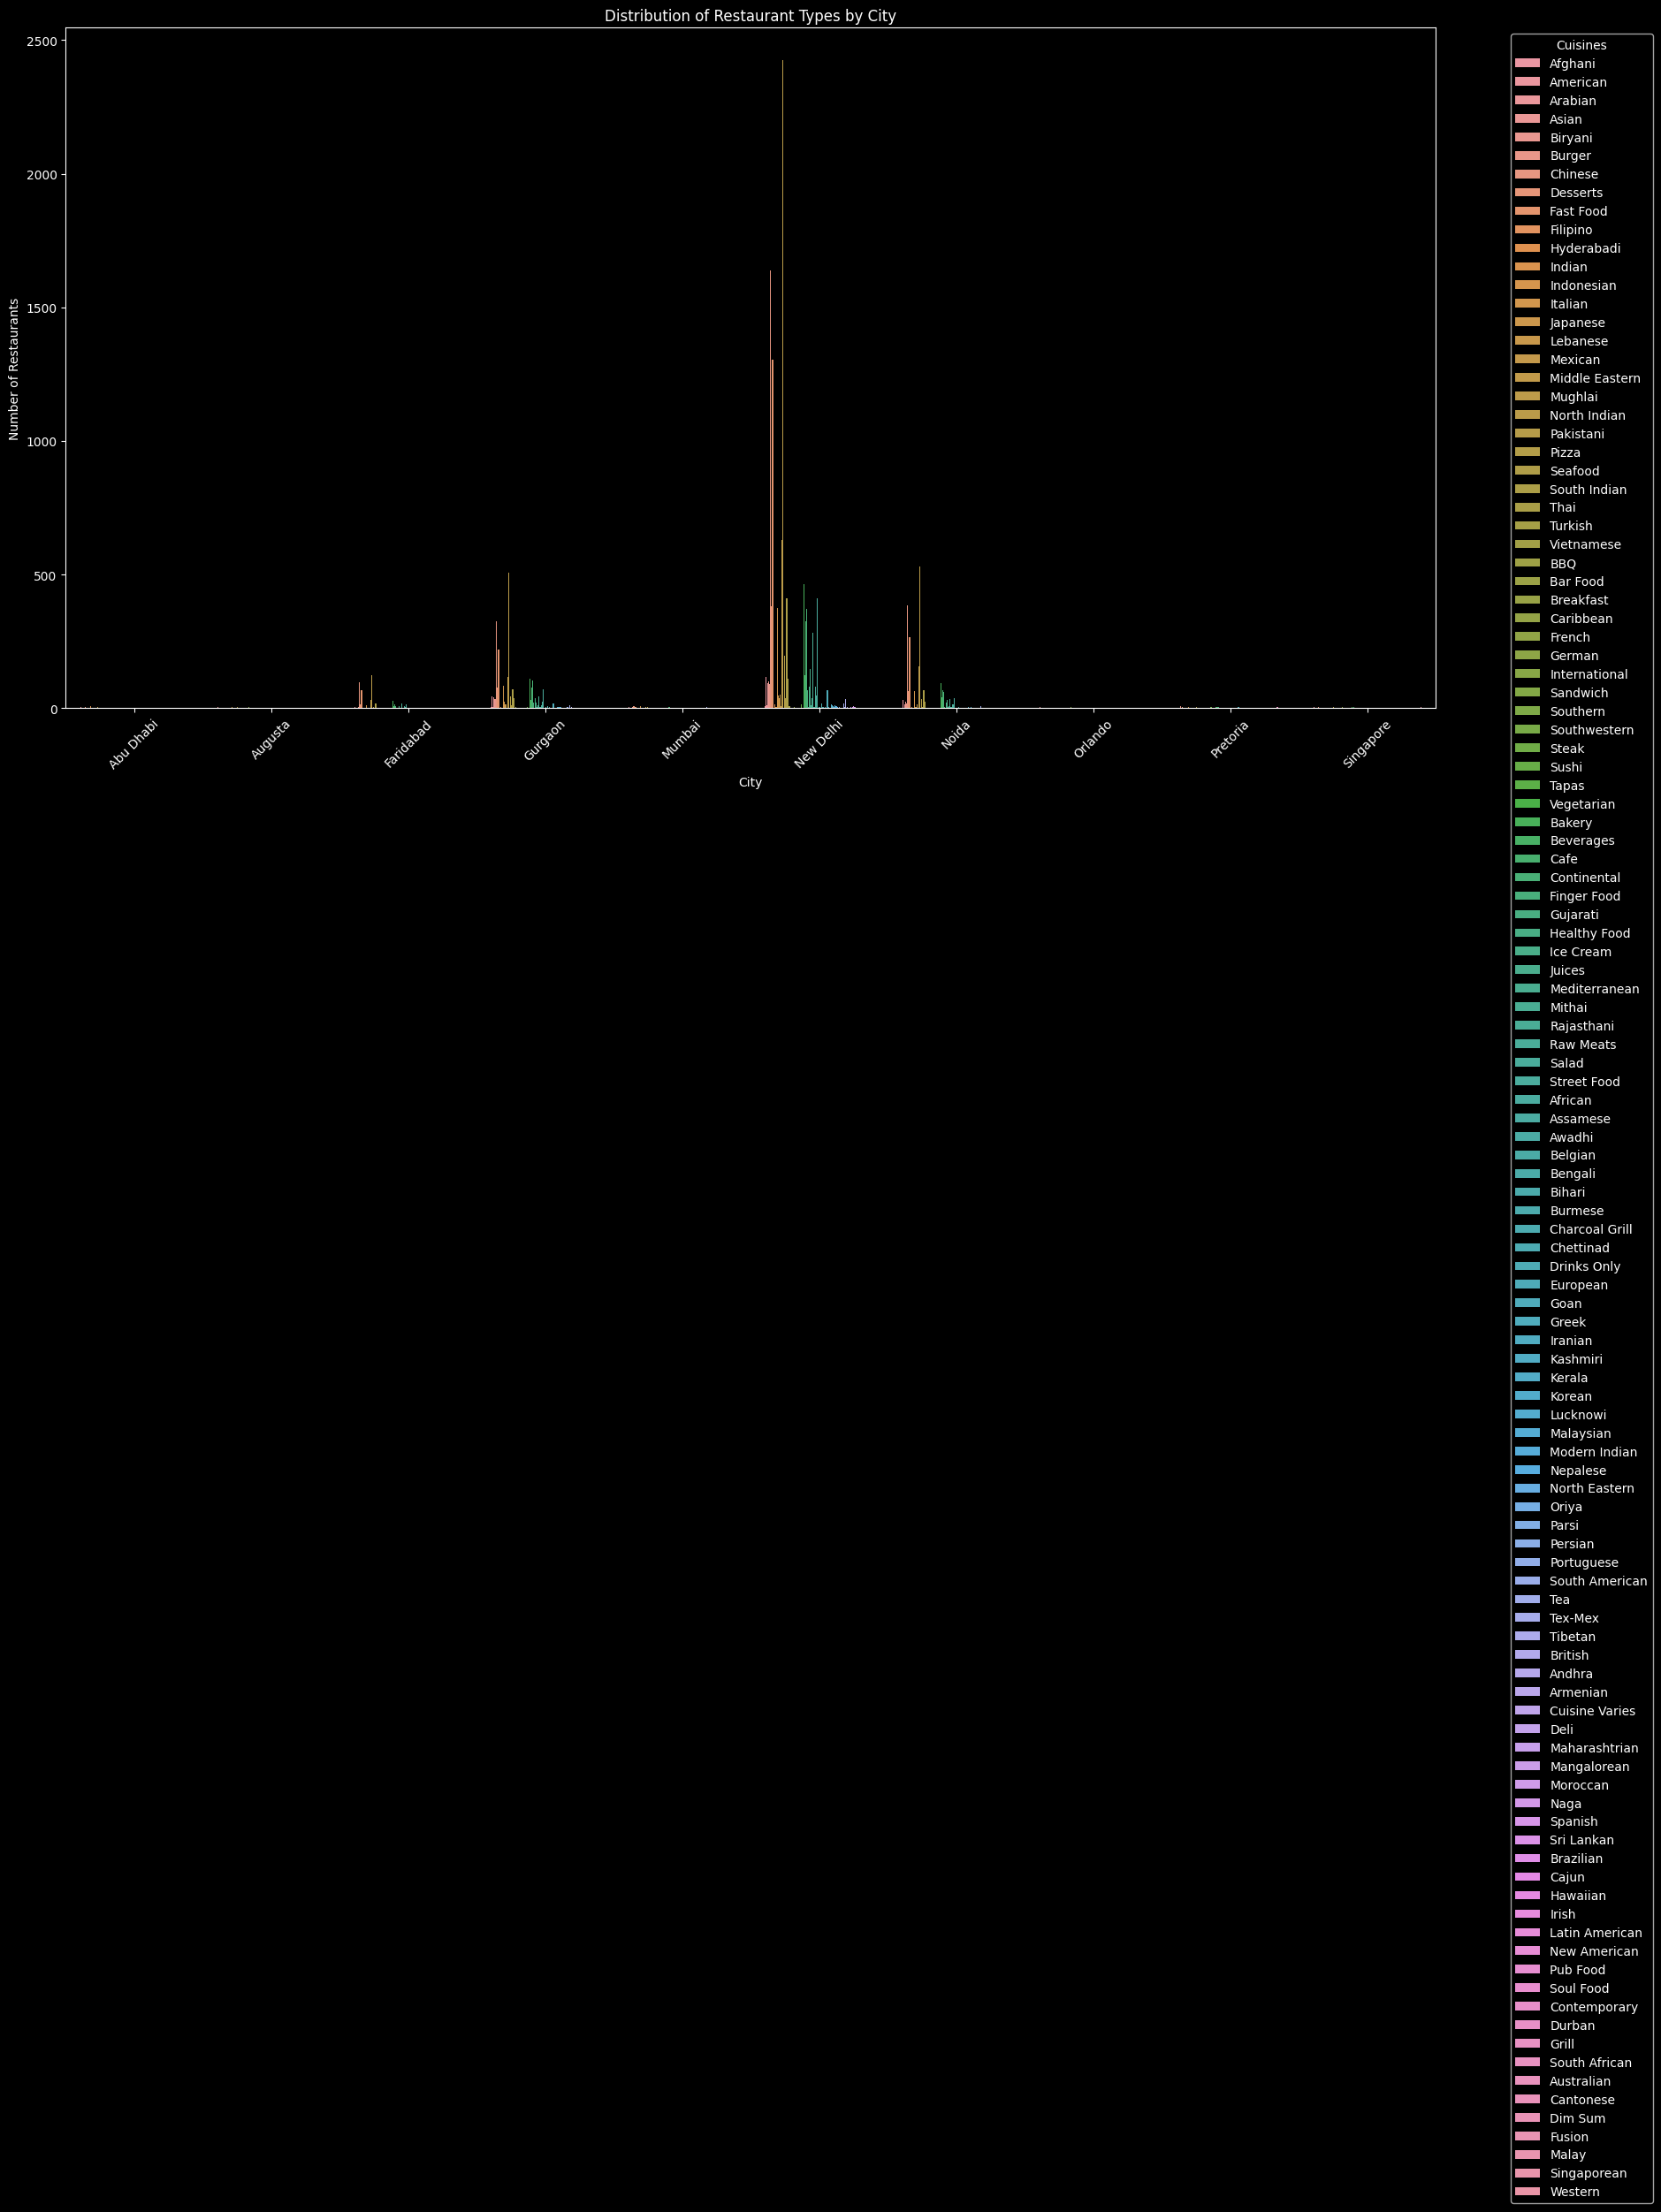

In [92]:
plt.figure(figsize=(20, 10))
sns.barplot(x='City', y='Count', hue='Cuisines', data=subset_data)
plt.title('Distribution of Restaurant Types by City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.legend(title='Cuisines', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# **Now Number of Votes Location Wise**

In [106]:
file_path = '../input/dataset/dataset.csv'
data = pd.read_csv(file_path)

In [107]:
grouped_votes = data.groupby(['City', 'Locality'])['Votes'].sum().reset_index()

In [108]:
top_localities = grouped_votes.groupby('City')['Votes'].sum().sort_values(ascending=False).head(10).index
subset_votes = grouped_votes[grouped_votes['City'].isin(top_localities)]

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='City', y='Votes', hue='Locality', data=subset_votes)
plt.title('Number of Votes for Restaurants by Location')
plt.xlabel('City')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45)
plt.legend(title='Locality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()